In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

In [2]:
# Sets the number of examples.
M = 1000

# Create target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
y = 2*x1 + 2*x2 + np.random.randn(M, 1)


#Criação de mini-batch
mb_size = 80

mb_position = np.random.randint(M,size=mb_size)

x1mb = x1[mb_position]
x2mb = x2[mb_position]
ymb = y[mb_position]

In [3]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1mb + A2[iter1][iter2]*x2mb
        J[iter1][iter2] = (1/mb_size)*np.sum( np.square(ymb - yhat)  )

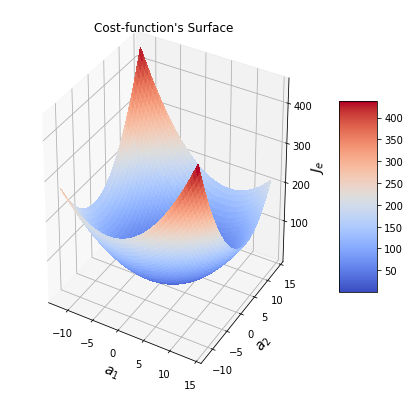

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

In [5]:
# Concatenate both column vectors.
X = np.c_[x1mb, x2mb]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(ymb))
yhat = a_opt[0, 0]*x1mb + a_opt[1, 0]*x2mb
Joptimum = (1/mb_size)*np.sum(np.power((ymb - yhat), 2) )

In [6]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/mb_size)*sum(np.power(ymb - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))
#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/mb_size * X.T.dot(ymb - X.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    Jgd[iteration+1] = (1/mb_size)*sum(np.power( (ymb - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

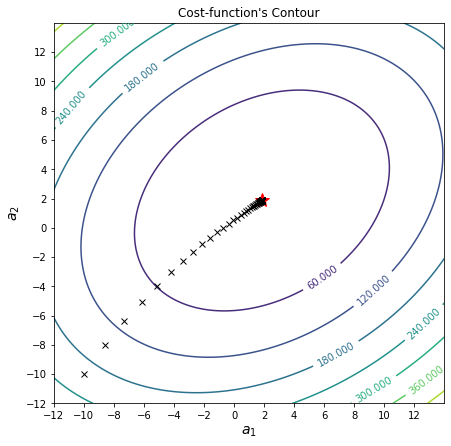

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot figure.        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

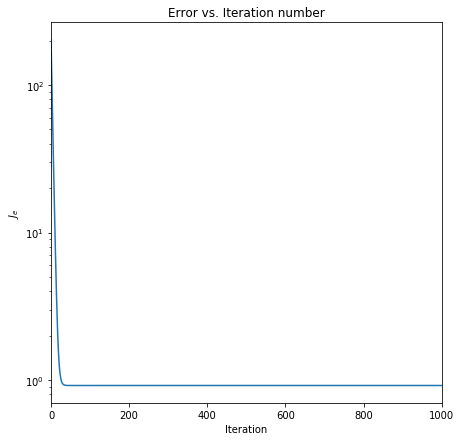

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [9]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 1.8587495146330746
a2_opt: 1.8640899624350507
a1_gd: 1.8587495146330744
a2_gd: 1.864089962435051


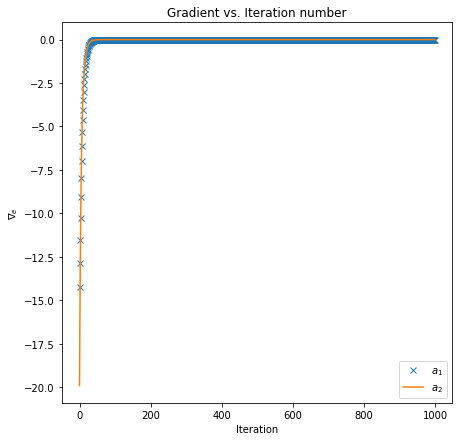

In [10]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, iteration), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()